In [1]:
import torch
import glob
import os

from model import SARModel
from dataset import SARdataset
import albumentations as A

import lightning as L
import os
import glob

from model import SARModel
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
import cv2


project_p = "/home/ao/Desktop/ieee/"
train_data_p = project_p + "data/Track1/train/images/"
train_label_p = project_p + "data/Track1/train/labels/"
test_data_p = project_p + "data/Track1/val/images/"

dev_data_p = project_p + "data/dev/p1"

batch_size = 8

if __name__ == "__main__":
    # img_l = glob.glob(os.path.join(train_data_p, '*.tif'))
    img_l = glob.glob(os.path.join(dev_data_p, "*.tif"))
    # label_l = glob.glob(os.path.join(train_label_p, '*.png'))
    img_l.sort()

/home/ao/anaconda3/envs/kaggle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-02-18 11:06:58.389203: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-18 11:06:58.410728: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 11:06:58.410751: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 11:06:58.

In [2]:
# ! rm -f sub.zip
# ! rm -f /home/ao/Desktop/ieee/rubbish/sub/*
# # ! mv "*_msk.png" sub
# ! mv *.png sub

In [3]:
from tool import *

# show_tiff_id(0, img_l, power=True)

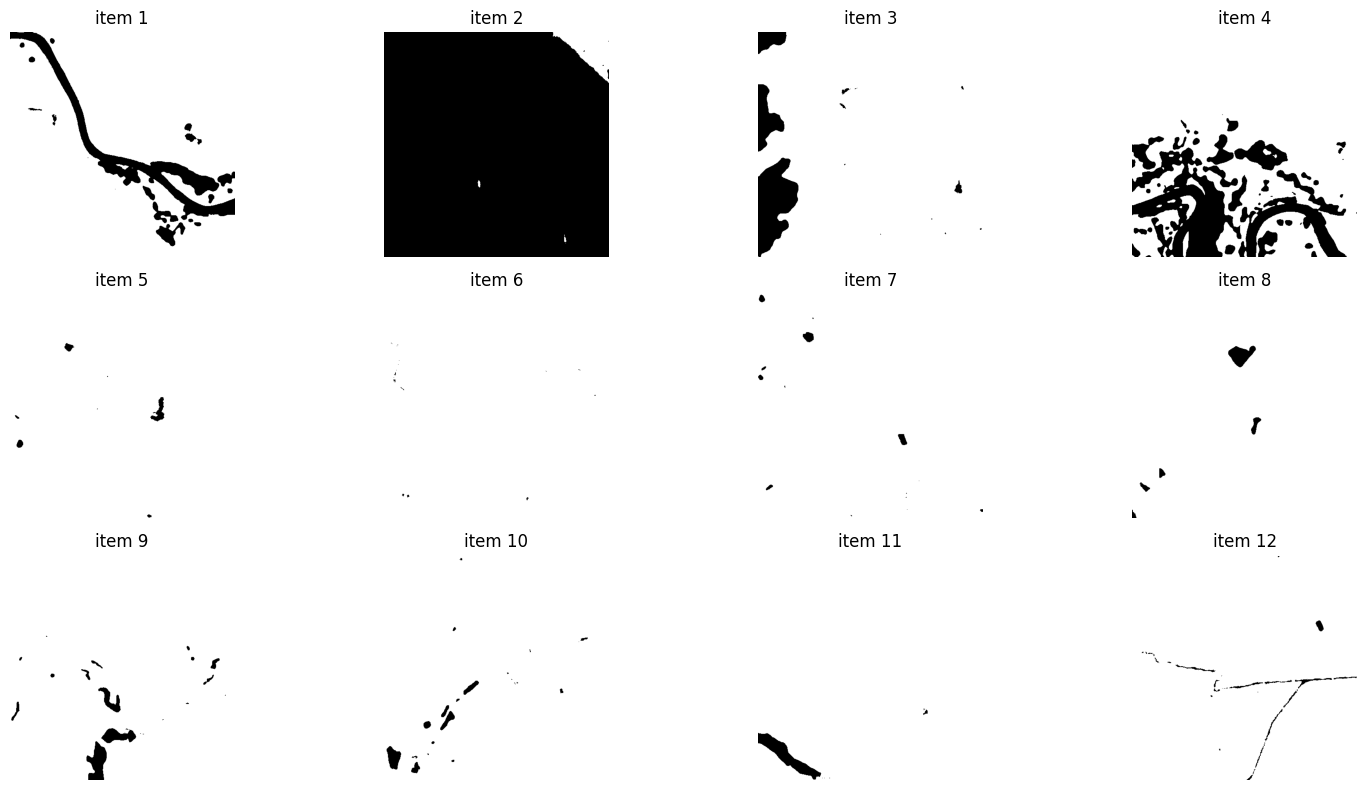

In [4]:
from tool import *

check_sub()
# show_label(t)